In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments._cda_environment import CDAEnvironment
from recgame.data_augmentation import CDA
from recgame.recourse import DiCE, NFeatureRecourse
from recgame.utils import generate_synthetic_data

In [2]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED+1)
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = .1  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

# model = RandomForestClassifier().fit(df, y)
model = LogisticRegression().fit(df, y)

In [3]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
        random_state=rng,
    )
    return X

# CDA experiment

In [4]:
y = (model.predict_proba(df)[:, 1] > .7).astype(int)

recourse = NFeatureRecourse(model, threshold=0.7, categorical=categorical)
CDA(recourse=recourse, ir=1, random_state=42).fit_resample(df, y)

(          f_0       f_1
 0    0.601572  0.153339
 1    0.750150  0.813522
 2   -0.150345  0.065940
 3    0.542613  0.394586
 4    0.494400  0.215652
 ..        ...       ...
 191  1.032781  0.099074
 192  1.022959  0.084240
 193  1.165577  0.299635
 194  0.917010 -0.075773
 195  1.162986  0.295721
 
 [196 rows x 2 columns],
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

# Environment experiment

In [5]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(model, categorical=categorical)
recourse.set_actions(df)
recourse.action_set_.ub = [2, 2]

environment = CDAEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="binary_constant",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(9)

CDAEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
               adaptation=0.1, behavior_function='binary_constant',
               data_source_func=<function data_source_func at 0x7fa63469d5a0>,
               growth_rate=10, growth_rate_type='absolute', random_state=42,
               recourse=NFeatureRecourse(categorical=[],
                                         model=LogisticRegression(),
                                         threshold=0.7004785929732098),
               threshold=10)

In [6]:
environment.X_, environment.outcome_

from collections import Counter
Counter(environment.outcome_)

Counter({1: 10, 0: 90})

<Axes: title={'center': 'Population scores over 9 time steps'}, xlabel='Step', ylabel='Score'>

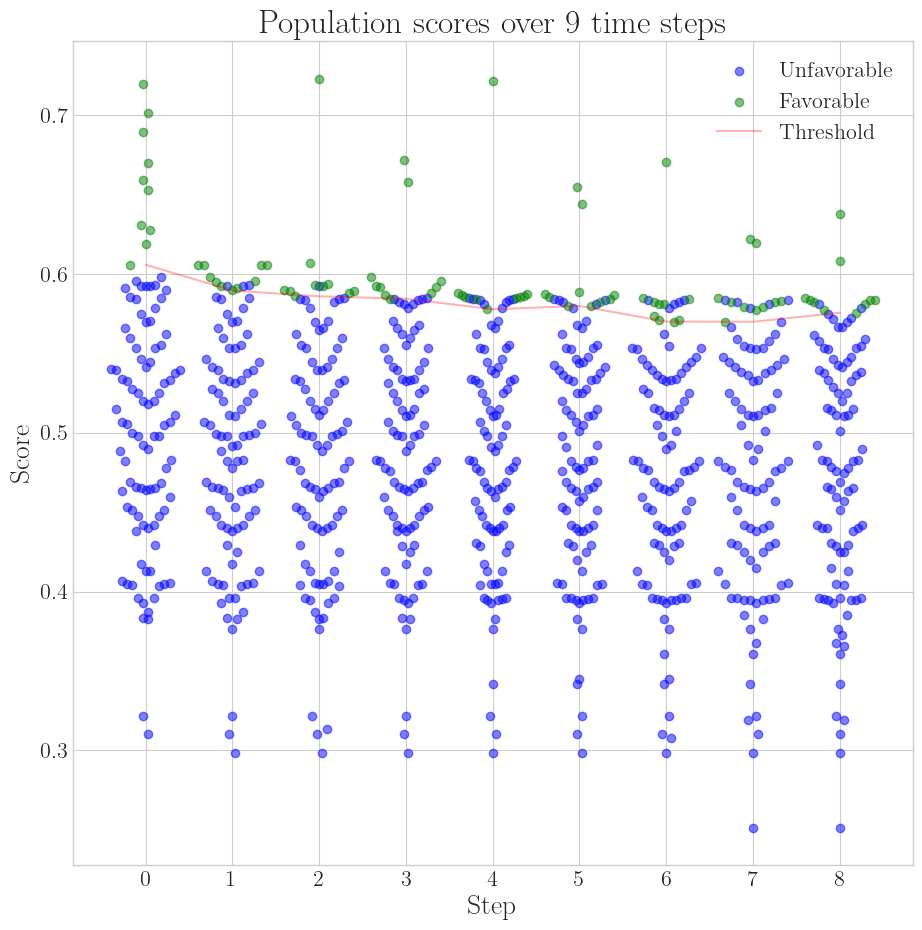

In [7]:
environment.plot.agent_scores(ref_model_step=0)

<Axes: title={'center': 'Population at t=1'}, xlabel='f_0', ylabel='f_1'>

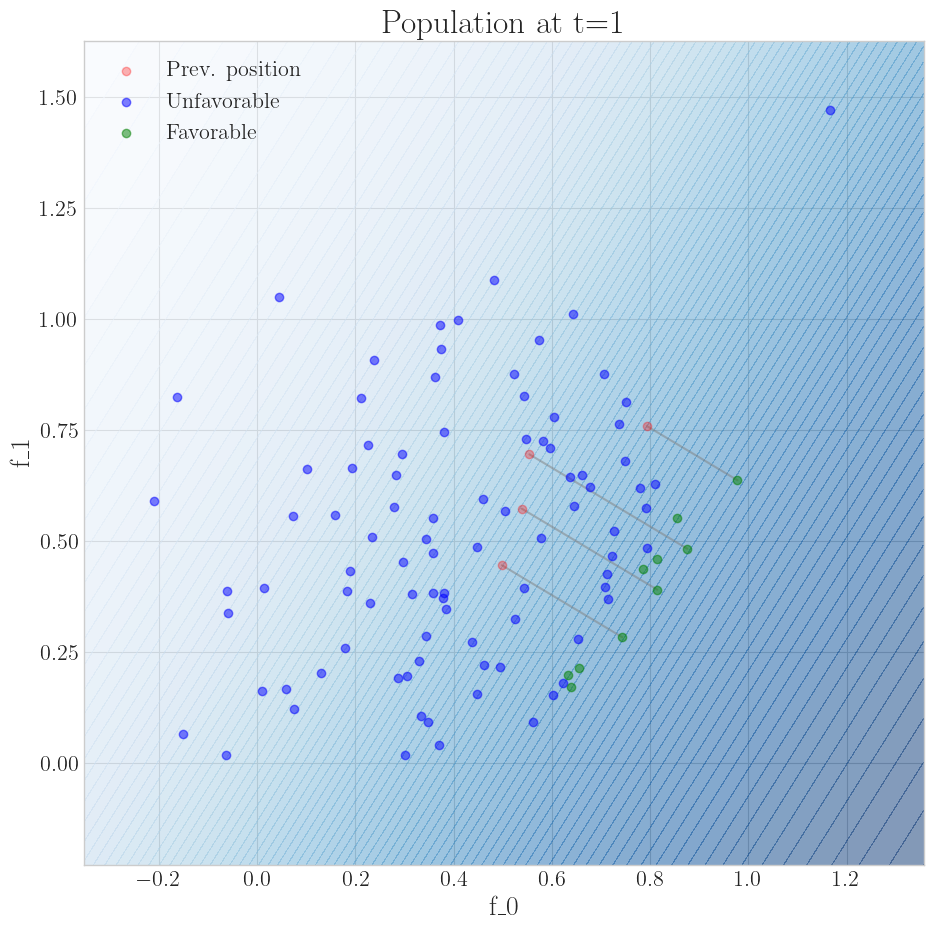

In [11]:
environment.plot.scatter(1)

<Axes: title={'center': 'Population at t=4'}, xlabel='f_0', ylabel='f_1'>

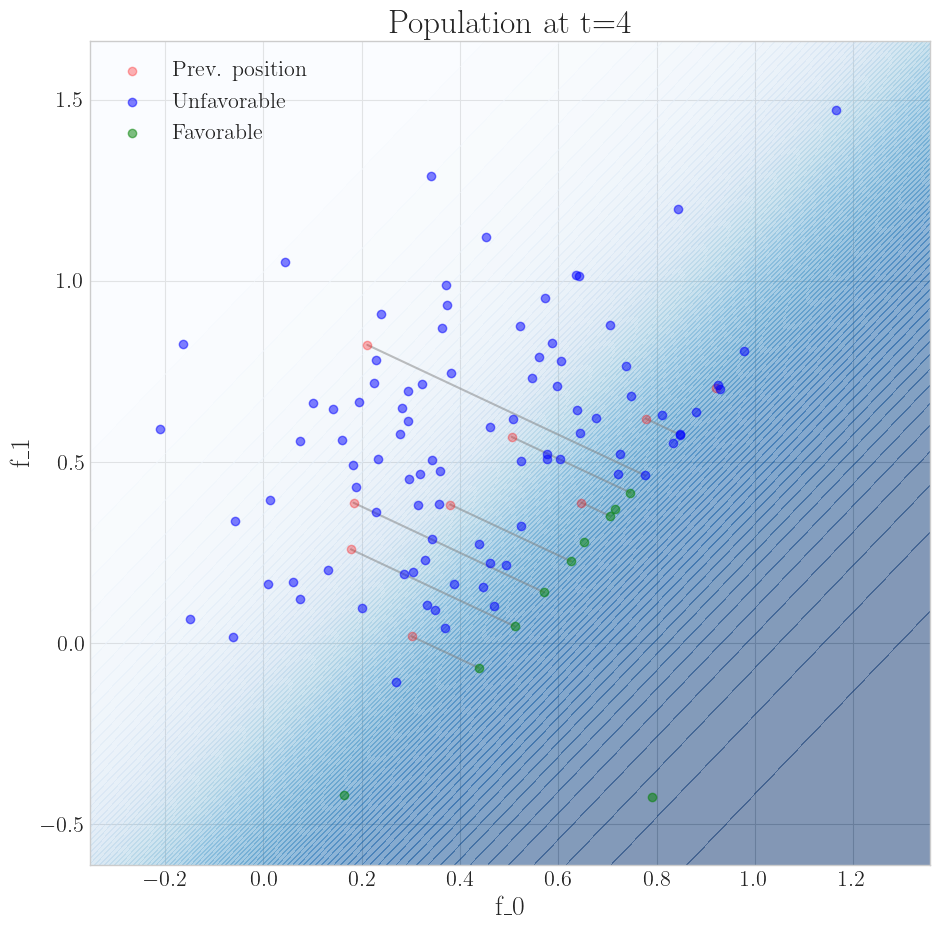

In [8]:
environment.plot.scatter(4)

<Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>

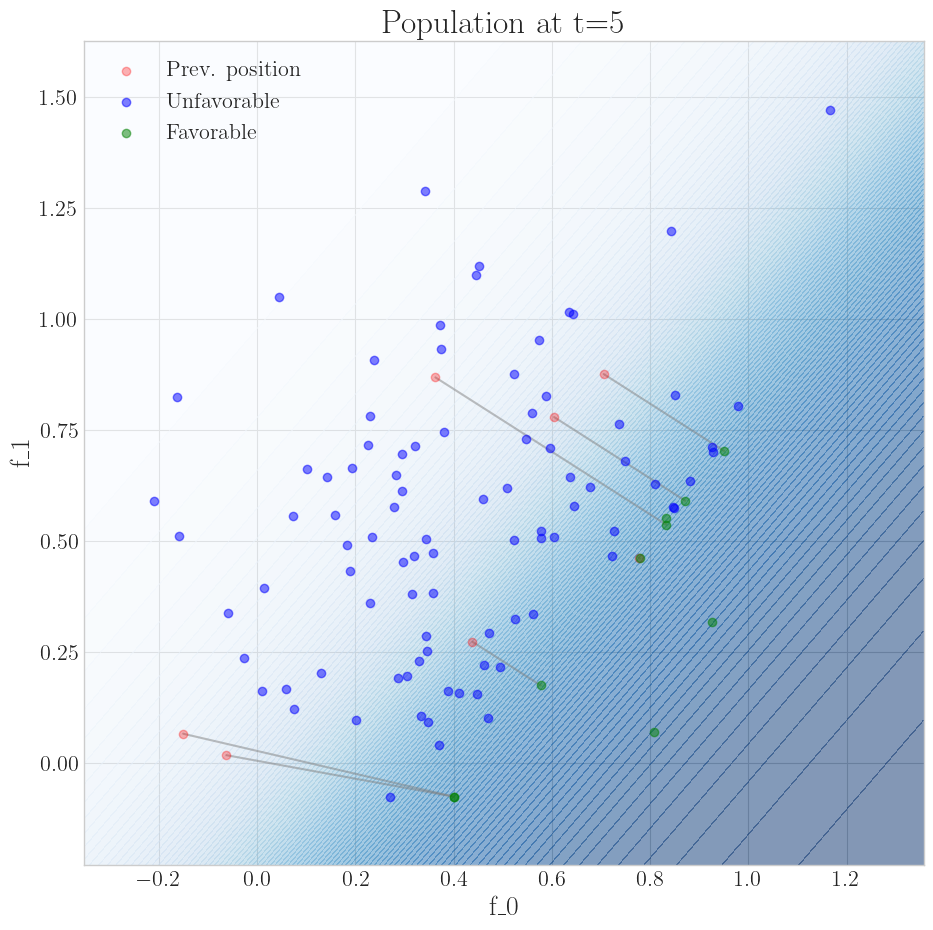

In [9]:
environment.plot.scatter(5)

<Axes: title={'center': 'Population at t=6'}, xlabel='f_0', ylabel='f_1'>

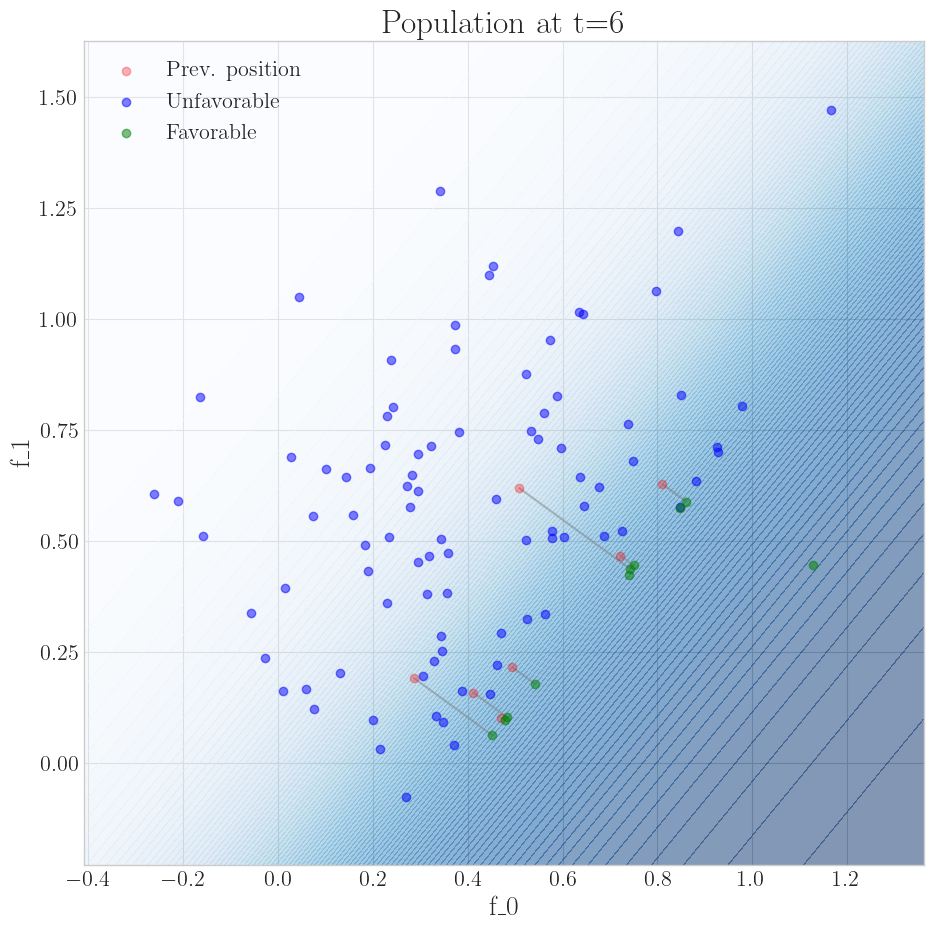

In [12]:
environment.plot.scatter(6)